In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('raw_data.csv', index_col=0)

In [3]:
df.head()

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
index,,,,,,,,
0,-4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.0,0.4,-4.2,-3.8,2.0,0.8489,0.8138,0.6950
2,-4.0,0.8,-4.4,-3.6,2.0,0.8331,0.7940,0.6783
3,-4.0,1.2,-4.6,-3.4,2.0,0.8343,0.7956,0.7250
4,-4.0,1.6,-4.8,-3.2,3.0,0.8327,0.7948,0.7367


**NOTE:** The 0th row failed because there was an error checking statement in `cpso.py` that prevented it from being called with a vbounds range of 0.

In [4]:
df.tail()

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
index,,,,,,,,
15,-4.0,6.0,-7.0,-1.0,2.0,0.8372,0.7992,0.6983
16,-4.0,6.4,-7.2,-0.8,2.0,0.8337,0.7948,0.7000
17,-4.0,6.8,-7.4,-0.6,2.0,0.8375,0.7994,0.6783
18,-4.0,7.2,-7.6,-0.4,2.0,0.8212,0.7791,0.7750
19,-4.0,7.6,-7.8,-0.2,2.0,0.8333,0.7943,0.8033


**NOTE:** The final range is not 8.0 as designed, but 7.6. Upon checking `experiment_script.py`, it looks like I forgot that the stop argument of `np.linspace` is excluded. Both of the **NOTE**s so far are experimental error. However, I do not think the loss of this data will impact the results, so I am moving forward with the analysis.

In [5]:
df.drop(0, axis=0, inplace=True)

In [6]:
df.head()

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
index,,,,,,,,
1,-4.0,0.4,-4.2,-3.8,2.0,0.8489,0.8138,0.6950
2,-4.0,0.8,-4.4,-3.6,2.0,0.8331,0.7940,0.6783
3,-4.0,1.2,-4.6,-3.4,2.0,0.8343,0.7956,0.7250
4,-4.0,1.6,-4.8,-3.2,3.0,0.8327,0.7948,0.7367
5,-4.0,2.0,-5.0,-3.0,2.0,0.8652,0.8342,0.6971


In [7]:
df.loc[:, ['vrange', 'num_of_features', 'a_fitness', 'training_score', 'test_score']]

,vrange,num_of_features,a_fitness,training_score,test_score
index,,,,,
1,0.4,2.0,0.8489,0.8138,0.6950
2,0.8,2.0,0.8331,0.7940,0.6783
3,1.2,2.0,0.8343,0.7956,0.7250
4,1.6,3.0,0.8327,0.7948,0.7367
5,2.0,2.0,0.8652,0.8342,0.6971
6,2.4,2.0,0.8217,0.7798,0.7733
7,2.8,2.0,0.8299,0.7899,0.7550
8,3.2,2.0,0.8373,0.7992,0.7900
9,3.6,2.0,0.8347,0.7960,0.7533


In [8]:
df.loc[:, ['vrange', 'num_of_features', 'a_fitness', 'training_score', 'test_score']].describe()

,vrange,num_of_features,a_fitness,training_score,test_score
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,4.000000,2.052632,0.835795,0.797442,0.720805
std,2.250926,0.229416,0.009900,0.012367,0.047457
min,0.400000,2.000000,0.821200,0.779100,0.638300
25%,2.200000,2.000000,0.831550,0.792100,0.689150
50%,4.000000,2.000000,0.833700,0.794800,0.725000
75%,5.800000,2.000000,0.837350,0.799250,0.754150
max,7.600000,3.000000,0.865200,0.834200,0.803300


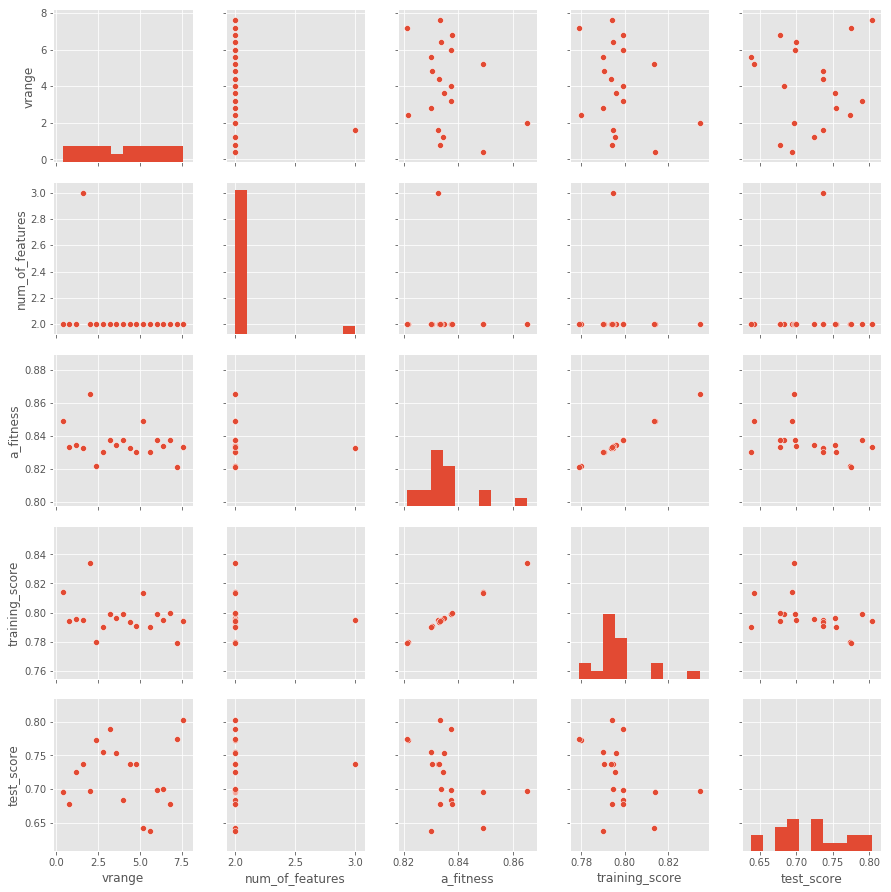

In [11]:
sns.pairplot(df.loc[:, ['vrange', 'num_of_features', 'a_fitness', 'training_score', 'test_score']])
plt.savefig('../../../lab_notebooks/cfs_notebook_files/Tuning_VBounds_Range_vcenter_-4.0_pairplot.svg')

As expected, the number of features is extremely low without exception. The v_bounds for this experiment ranged from (-4.4, -3.6) to (-7.8, -0.2). Thus velocities were always negative and position vectors were guaranteed to continually decrease.

No relation between test_score and vrange. Interestingly, fitness and training_score appear to be somewhat robust to range. Interested to see if this holds up in the other 4 cohorts. I predict that it will in vcenter=4.0, less so in -2 and 2 and least in 2.

In [13]:
df.corr(method='pearson')

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
vcenter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vrange,NaN,1.000000,-1.000000,1.000000,-0.258199,-0.272237,-0.279400,0.042459
vmin,NaN,-1.000000,1.000000,-1.000000,0.258199,0.272237,0.279400,-0.042459
vmax,NaN,1.000000,-1.000000,1.000000,-0.258199,-0.272237,-0.279400,0.042459
num_of_features,NaN,-0.258199,0.258199,-0.258199,1.000000,-0.075698,-0.051735,0.081107
a_fitness,NaN,-0.272237,0.272237,-0.272237,-0.075698,1.000000,0.999700,-0.431667
training_score,NaN,-0.279400,0.279400,-0.279400,-0.051735,0.999700,1.000000,-0.430448
test_score,NaN,0.042459,-0.042459,0.042459,0.081107,-0.431667,-0.430448,1.000000
